In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

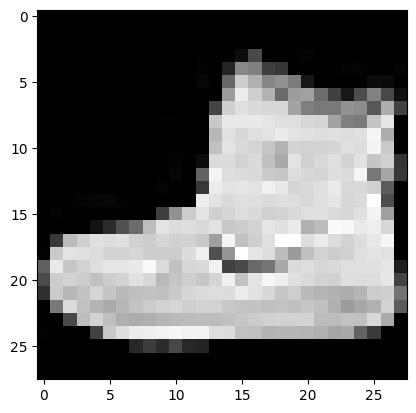

In [3]:
plt.imshow(x_train[0],cmap='gray')

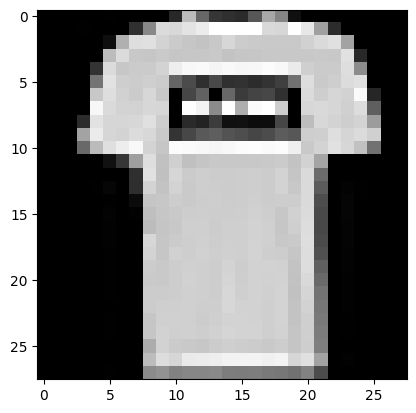

In [4]:
plt.imshow(x_train[1],cmap='gray')

In [5]:
x_train1 = x_train.astype('float32') / 255.0
x_test1 = x_test.astype('float32') / 255.0
x_train1 = x_train1.reshape(-1, 28, 28, 1)
x_test1 = x_test1.reshape(-1, 28, 28, 1)

In [6]:
x_train1.shape

(60000, 28, 28, 1)

In [7]:
x_test1.shape

(10000, 28, 28, 1)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

In [10]:
model = keras.Sequential([
keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(64, (3,3), activation='relu'),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(128, (3,3), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.25),
keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train1, y_train, epochs=5, validation_data=(x_test1, y_test))

Epoch 1/5
1875/1875 [==============================] - 32s 16ms/step - loss: 0.5657 - accuracy: 0.7901 - val_loss: 0.3598 - val_accuracy: 0.8678
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3594 - accuracy: 0.8676 - val_loss: 0.3149 - val_accuracy: 0.8863
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3164 - accuracy: 0.8820 - val_loss: 0.2954 - val_accuracy: 0.8892
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2916 - accuracy: 0.8940 - val_loss: 0.2834 - val_accuracy: 0.8950
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2760 - accuracy: 0.8984 - val_loss: 0.2757 - val_accuracy: 0.9036


In [12]:
test_loss, test_acc = model.evaluate(x_test1, y_test,verbose=0)
print('Test loss: ',test_loss)
print('Test accuracy:', test_acc)

Test loss:  0.27570176124572754
Test accuracy: 0.9035999774932861


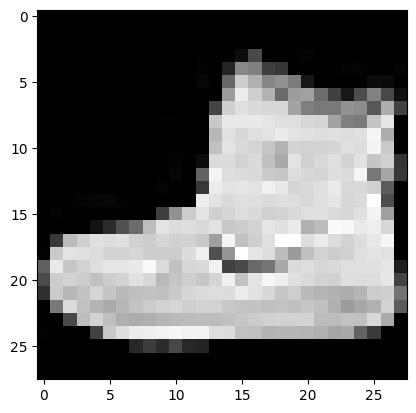

In [13]:
from PIL import Image

def preprocess_image(image_path):
    img = Image.fromarray(image_path)
    img = img.resize((28, 28),resample=Image.LANCZOS)
    img = img.convert('L')
    plt.imshow(img,cmap='gray')
    img = np.array(img) / 255.0
    img = img.reshape((1, 28, 28, 1))

    return img


input_image = preprocess_image(x_train[0])


In [14]:
item=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
prediction = model.predict(input_image,verbose=0)
print(prediction)
print("The number is:",item[np.argmax(prediction)])

[[1.6151159e-06 1.4427410e-07 2.1437567e-07 6.3904395e-07 8.4364700e-08
  5.7803110e-05 1.5785131e-06 4.1381191e-02 5.2628443e-06 9.5855147e-01]]
The number is: Ankle boot


[[2.9334764e-05 2.3425065e-08 9.9973947e-01 1.2498094e-07 2.6423417e-05
  1.3657727e-08 2.0447517e-04 5.1804633e-11 1.3227661e-07 1.4421837e-11]]
The number is: Pullover


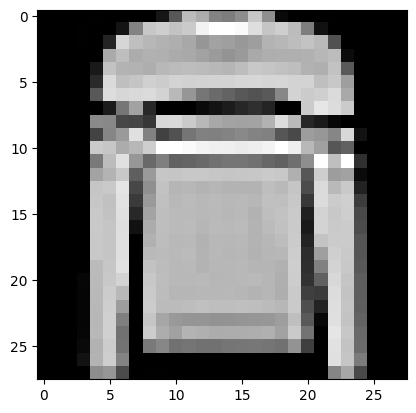

In [15]:
item=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
prediction = model.predict(preprocess_image(x_train[5]),verbose=0)
print(prediction)
print("The number is:",item[np.argmax(prediction)])